In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Resolutions for Geohash, H3, and S2
resolutions_geohash = np.arange(1, 13, 1)
resolutions_h3 = np.arange(0, 16, 1)
resolutions_s2 = np.arange(0, 31, 1)

# Normalize and rescale the x-values to match the range of S2
# Geohash original range [1, 12], normalize and scale to [0, 30]
norm_resolutions_geohash = (resolutions_geohash - 1) / (12 - 1) * 30
# H3 original range [0, 15], normalize and scale to [0, 30]
norm_resolutions_h3 = resolutions_h3 / 15 * 30
# S2 is already on a [0, 30] scale, no change needed
norm_resolutions_s2 = resolutions_s2

# Sampling fractions (Neighborhood Approximation)
fractions_ne = np.linspace(0.1, 1.0, 10)
# Sampling fractions (Stratified Sampling)
fractions_ss = np.linspace(0.1, 0.9, 9)

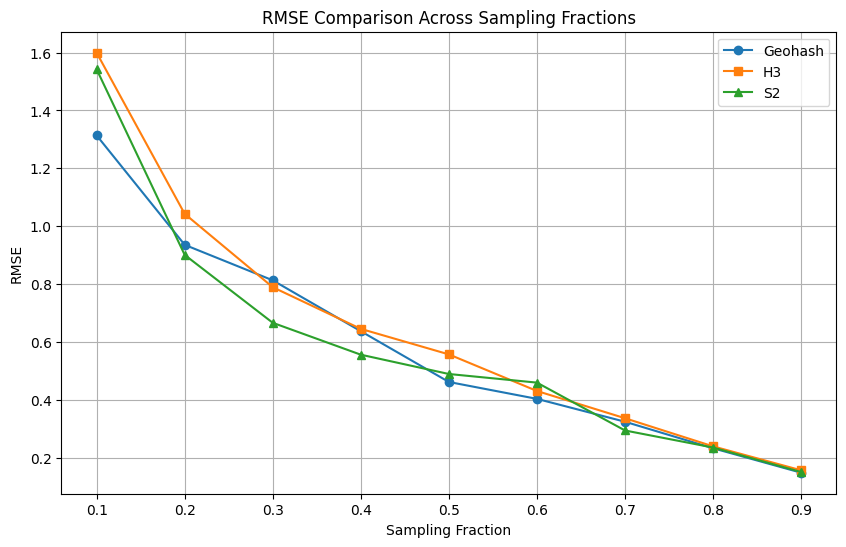

In [2]:
# RMSE data for each geocoding technique from Test B, Subtest 1
rmse_geohash = [1.3135894766503504, 0.9353612099939024, 0.8126399048050552, 0.6367245903194152, 0.46128837161715164, 0.40292230278656, 0.3238425015936079, 0.23216824072771602, 0.14766094939584246]
rmse_h3 = [1.59938544861353, 1.0423910366770797, 0.7889012561866583, 0.6448497173940643, 0.5566290125583052, 0.4301472557152568, 0.3359400525892151, 0.238761928865266, 0.15600156678032903]
rmse_s2 = [1.542137065892303, 0.9005298939965254, 0.665823755880591, 0.5555990658545764, 0.4888790410248103, 0.45906449645858133, 0.29361661072330797, 0.23469507292801325, 0.15006497709157351]

# Plotting RMSE comparison for Test B, Subtest 1
plt.figure(figsize=(10, 6))
plt.plot(fractions_ss, rmse_geohash, label='Geohash', marker='o')
plt.plot(fractions_ss, rmse_h3, label='H3', marker='s')
plt.plot(fractions_ss, rmse_s2, label='S2', marker='^')
plt.title('RMSE Comparison Across Sampling Fractions')
plt.xlabel('Sampling Fraction')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# RMSE data
rmse_geohash = [0.5721725253347661, 0.5182354959563604, 0.43435903536150766, 0.43624629885201255, 0.4527455081540093, 0.37121705619747425, 0.4224457395586235, 1.524859338333228, 6.879731638306178, 6.993986742443292, 6.25331232013121, 6.240956564562959]
rmse_h3 = [0.5794836123673966, 0.49831378741864674, 0.5460411800741468, 0.6056073100318424, 0.6239376226744667, 0.5021809705642094, 0.5288375695141551, 0.43170848632788345, 0.44116110209819287, 0.3573139741541648, 0.4064797450317375, 0.8741385197964662, 2.026828775083562, 4.987466999596284, 7.832931460961032, 7.083020608516094]
rmse_s2 = [0.5267380934965878, 0.5360866853089092, 0.5276005019481302, 0.6029950757185195, 0.6016847857011961, 0.48291726034852067, 0.6066455787715338, 0.5258984303875407, 0.5336434542867161, 0.5138319469388104, 0.6182549953940019, 0.4955919423619713, 0.4743896584405509, 0.4511310595429948, 0.3964369822277352, 0.4033861466284431, 0.38874607608335915, 0.6293812756603222, 1.0609225070641615, 2.124085465362216, 4.109292312661917, 7.0109967933668935, 7.719403267341555, 7.080846091489711, 6.519676449374975, 6.171550371081104, 6.275775052030362, 6.241388429223252, 6.215379338644524, 6.264715967687675, 6.246389895942282]

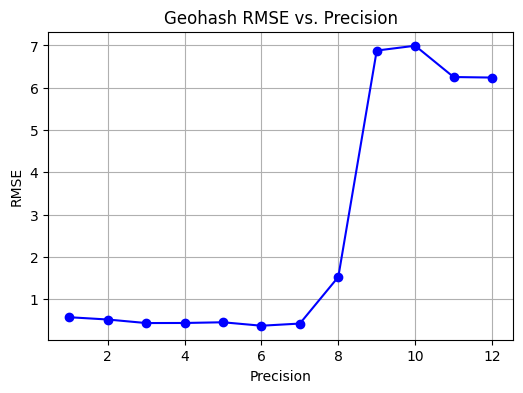

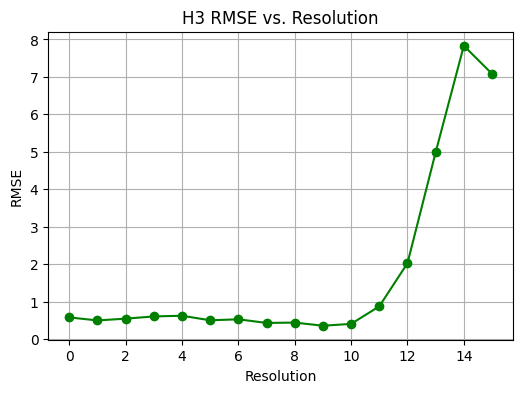

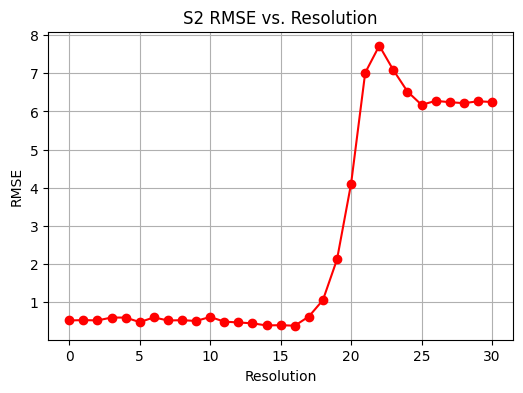

In [4]:
# Plots for each type
def plot_data(resolutions, rmse_data, color, title_prefix, resolution_phrase='Resolution'):
    plt.figure(figsize=(6, 4))
    plt.plot(resolutions, rmse_data, 'o-', color=color)
    plt.title(f'{title_prefix} RMSE vs. {resolution_phrase}')
    plt.xlabel(resolution_phrase)
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

# Plotting
plot_data(resolutions_geohash, rmse_geohash, 'blue', 'Geohash', 'Precision')
plot_data(resolutions_h3, rmse_h3, 'green', 'H3')
plot_data(resolutions_s2, rmse_s2, 'red', 'S2')

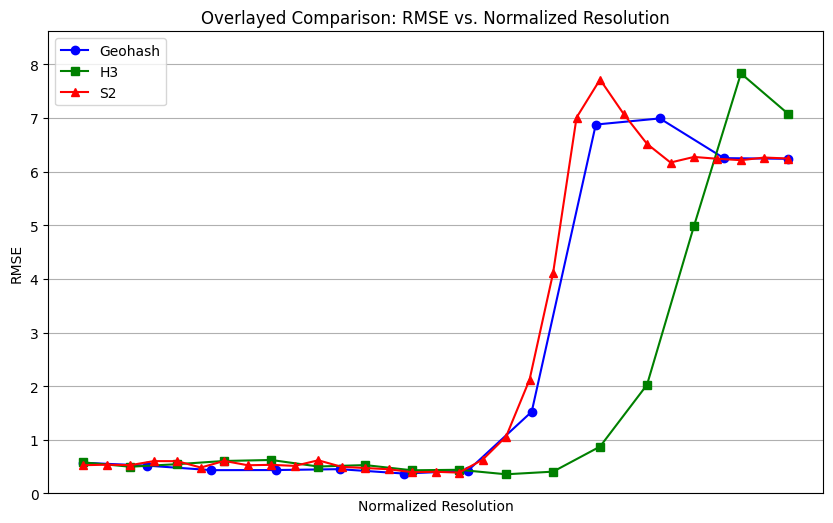

In [5]:
# Determine the global y-axis limits
global_ymin_rmse = min(min(rmse_geohash), min(rmse_h3), min(rmse_s2))
global_ymax_rmse = max(max(rmse_geohash), max(rmse_h3), max(rmse_s2))

# Adjust y-axis minimum to be at most 0
global_ymin_rmse = min(global_ymin_rmse, 0)

# Adjust y-axis maximum to be one step higher; determine step by analyzing the data spread
rmse_range = global_ymax_rmse - global_ymin_rmse
y_step_rmse = rmse_range / 10  # Example step calculation, dividing into ten parts
global_ymax_rmse += y_step_rmse

plt.figure(figsize=(10, 6))
plt.plot(norm_resolutions_geohash, rmse_geohash, 'o-', color='blue', label='Geohash')
plt.plot(norm_resolutions_h3, rmse_h3, 's-', color='green', label='H3')
plt.plot(norm_resolutions_s2, rmse_s2, '^-', color='red', label='S2')
plt.title('Overlayed Comparison: RMSE vs. Normalized Resolution')
plt.xlabel('Normalized Resolution')
plt.ylabel('RMSE')
plt.ylim(global_ymin_rmse, global_ymax_rmse)
plt.legend()
plt.grid(True)
plt.xticks([])  # Hiding x-axis labels
plt.show()